# Room weather adaptiaon

#### Present working Directory

In [2]:
pwd

'C:\\Users\\BLAZIN\\Python Projects\\Room weather adaptation'

#### Import the OS Directory

In [3]:
import os
os.chdir("E:\\Python\\Resume Projects\\Room weather adaptation\\Data\\Samples")

### Import packages

In [4]:
import pandas as pd
import numpy as np

#### Load the dataframe

In [5]:
df_weather = pd.read_csv('weatherHistoryBasic.csv', index_col=None)

In [6]:
df_weather.head()

,Hour,Apparent,Temperature,Customer Temperature
0,0,7.388889,9.472222,2
1,1,7.227778,9.355556,6
2,2,9.377778,9.377778,15
3,3,5.944444,8.288889,20
4,4,6.977778,8.755556,2


In [7]:
df_weather.describe()

,Hour,Apparent,Temperature,Customer Temperature
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.500327,10.855029,11.932678,8.459208
std,6.922081,10.696847,9.551546,6.903312
min,0.000000,-27.716667,-21.822222,-3.000000
25%,6.000000,2.311111,4.688889,2.000000
50%,12.000000,12.000000,12.000000,8.000000
75%,18.000000,18.838889,18.838889,14.000000
max,23.000000,39.344444,39.905556,20.000000


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
Hour                    96453 non-null int64
Apparent                96453 non-null float64
Temperature             96453 non-null float64
Customer Temperature    96453 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.9 MB


In [9]:
df_weather.shape

(96453, 4)

#### Feature Engineering

In [10]:
X = df_weather[['Hour', 'Apparent', 'Temperature']]
Y = df_weather[['Customer Temperature']]

#### Exploratory Data Analysis

In [11]:
np.corrcoef(X['Apparent'], X['Temperature'])

array([[1.        , 0.99262856],
       [0.99262856, 1.        ]])

##### Visual Insight

###### Import the packages

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

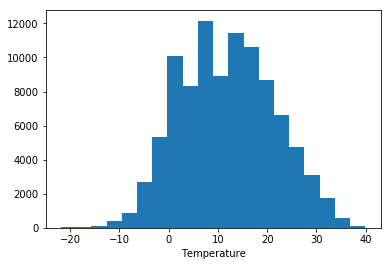

In [13]:
plt.hist(X['Temperature'], bins=20)
plt.xlabel('Temperature')
plt.show()

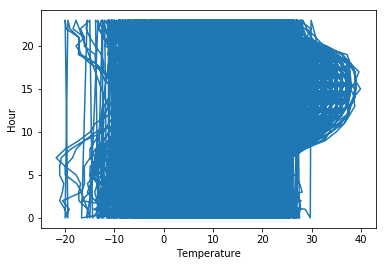

In [14]:
plt.plot(X['Temperature'],X['Hour'])
plt.xlabel('Temperature')
plt.ylabel('Hour')
plt.show()

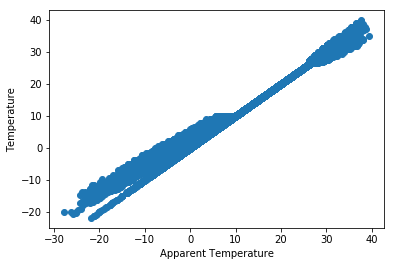

In [15]:
plt.scatter(X['Apparent'],X['Temperature'])
plt.xlabel('Apparent Temperature')
plt.ylabel('Temperature')
plt.show()

###### Heat map

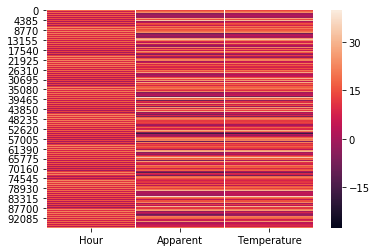

In [16]:
sns.heatmap(data=X)
plt.show()

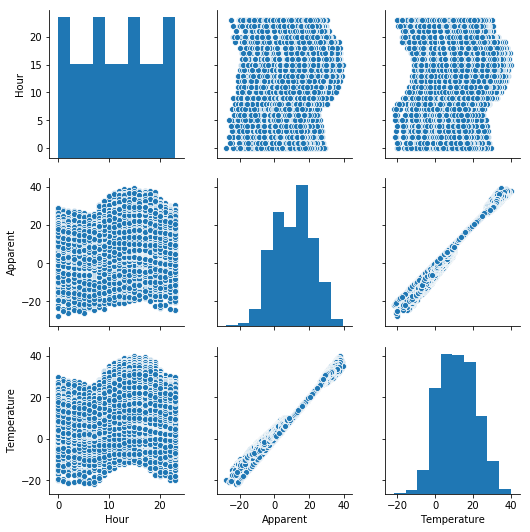

In [17]:
sns.pairplot(data=X)
plt.show()

#### Multicolinearity - reduce variable which are colinear to each other

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
transformer = ReduceVIF()
X = transformer.fit_transform(X, Y)

NameError: name 'ReduceVIF' is not defined

#### Split data to train and test

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=294)

#### Fit the Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

###### Cross fold validation

In [22]:
from sklearn.model_selection import cross_val_score
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 1.39462361e-04  9.00973892e-05 -4.90986117e-05  1.95326417e-04
 -3.05112246e-04]
Average 5-Fold CV Score: 1.4135061868647547e-05


In [23]:
#Fit the model
model_fit = model.fit(x_train, y_train)

In [24]:
model_fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###### Score the model

In [25]:
model.score(x_test, y_test)

-0.0002744834282486508

In [26]:
#Slope and intercept
Intercept = model_fit.intercept_
slope = model_fit.coef_
Hour_Slope = model_fit.coef_[0,0]
Apparent_slope = model_fit.coef_[0,1]
print('Intercept: ' + str(Intercept))
print('Slope: ' + str(slope))

Intercept: [8.41627669]
Slope: [[ 0.00309319  0.03459082 -0.03123003]]


##### Predict with the test data

In [27]:
y_pred = model_fit.predict(x_test)
y_pred

array([[8.54496432],
       [8.53889001],
       [8.48321275],
       ...,
       [8.53298365],
       [8.50808875],
       [8.52943619]])

##### Plot the residuals

C:\Users\BLAZIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


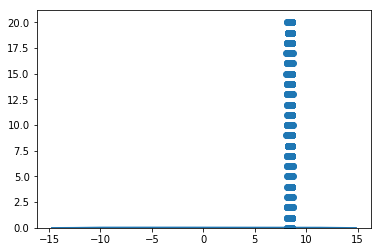

In [28]:
#Scatter plot of Prediction and test
plt.scatter(y_pred, y_test)

#Residual Histogram
sns.distplot((y_test - y_pred), bins = 50)

### Model Evaluation

###### Calculate the R2 for the test data to find the variance of the predicted model and the acutal model.

In [29]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_pred)

-0.0002744834282486508

###### RMSE(Root Mean Square Error) - 
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors: RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
#Standard deviation of the residual.
#Lower the standard deviation good for the model.

In [30]:
from sklearn import metrics
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  6.894078142361899
